# Churn

Objective + project explination + summary of findings

## Loading libraries and data

In [1]:
## Loading basic libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings 
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Loading scikit-learn tools library

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
## loading data
### Loading billing data
df_billing = pd.read_excel('../input/churn-data/Customer_Billing.xlsx')
### Loading usage data
df_usage = pd.read_excel('../input/churn-data/Customer_Usage.xlsx')
### Loading demographics data
df_demographics = pd.read_excel('../input/churn-data/Customer_Demographics.xlsx')


In [4]:
## Merge Data

df_merge_col1=pd.merge(df_billing,df_usage,on='customerID')
df_merge=pd.merge(df_merge_col1,df_demographics,on='customerID')
df_merge.columns.values

array(['Unnamed: 0_x', 'customerID', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 0_y', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Unnamed: 0', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents'], dtype=object)

In [5]:
## Clean unnamed columns
df_clean=df_merge.drop(['Unnamed: 0_x'], axis=1)
df_clean=df_clean.drop(['Unnamed: 0_y'], axis=1)
df=df_clean.drop(['Unnamed: 0'], axis=1)

## test the Dataframe
df.tail(1)

,customerID,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
7042,3186-AJIEK,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,66,Yes,No,...,Yes,No,Yes,Yes,Yes,Yes,Male,0,No,No


## Undertanding the data

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [6]:
## Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Contract          7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   object 
 6   Churn             7043 non-null   object 
 7   tenure            7043 non-null   int64  
 8   PhoneService      7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [7]:
## get data shape

df.shape

(7043, 21)

In [8]:
df.columns.values

array(['customerID', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents'], dtype=object)

* The target the we will use to guide the exploration is **Churn**

***

## Visualize missing values

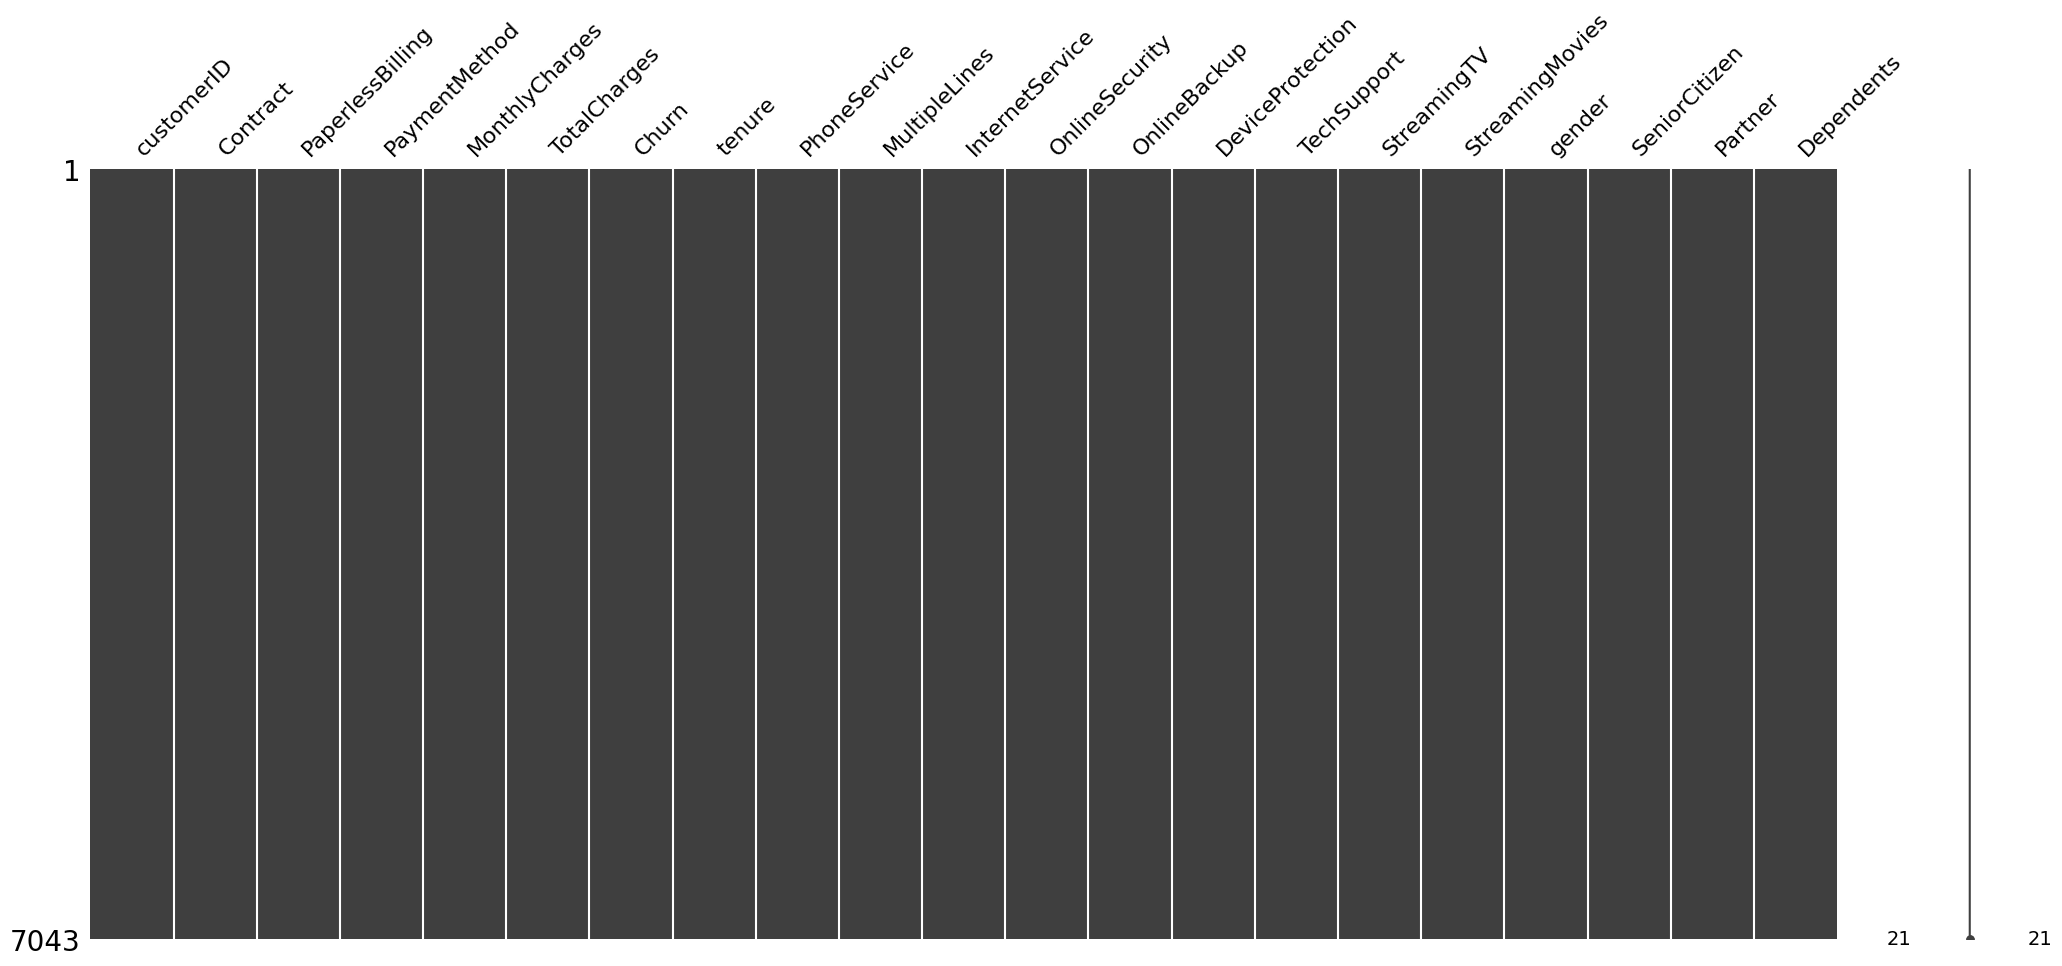

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);

> Using this matrix we can very quickly find the pattern of missingness in the dataset. 
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

## Data Manipulation

In [10]:
df = df.drop(['customerID'], axis = 1)
df.head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,One year,No,Mailed check,56.95,1889.5,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,One year,No,Bank transfer (automatic),42.30,1840.75,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
dtype: int64

* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [12]:
df[np.isnan(df['TotalCharges'])]

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
488,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Female,0,Yes,Yes
753,Two year,No,Mailed check,20.25,NaN,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,No,Yes
936,Two year,No,Mailed check,80.85,NaN,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
1082,Two year,No,Mailed check,25.75,NaN,No,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,Yes,Yes
1340,Two year,No,Credit card (automatic),56.05,NaN,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes
3331,Two year,No,Mailed check,19.85,NaN,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,Yes,Yes
3826,Two year,No,Mailed check,25.35,NaN,No,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,Yes,Yes
4380,Two year,No,Mailed check,20.00,NaN,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,0,Yes,Yes
5218,One year,Yes,Mailed check,19.70,NaN,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,Yes,Yes
6670,Two year,No,Mailed check,73.35,NaN,No,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.


Let's see if there are any other 0 values in the tenure column.

In [13]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

These seem to be new client, and have not entered the telecom cycle

In [14]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [15]:
# Checking for null values
df.isnull().sum()

Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [16]:
# change values from object to numbers
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

df.head(100)

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Female,No,Yes,No
1,One year,No,Mailed check,56.95,1889.50,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Male,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,No,No,No
3,One year,No,Bank transfer (automatic),42.30,1840.75,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,No,No,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Female,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Month-to-month,Yes,Electronic check,78.95,927.35,Yes,12,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Female,No,No,No
96,One year,Yes,Credit card (automatic),66.85,4748.70,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Male,No,Yes,Yes
97,Month-to-month,No,Mailed check,21.05,113.85,Yes,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,No,No,No
98,Two year,No,Bank transfer (automatic),21.00,1107.20,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,No,No,No


In [17]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [18]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


___

## Data Visualization

In [19]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [20]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [21]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

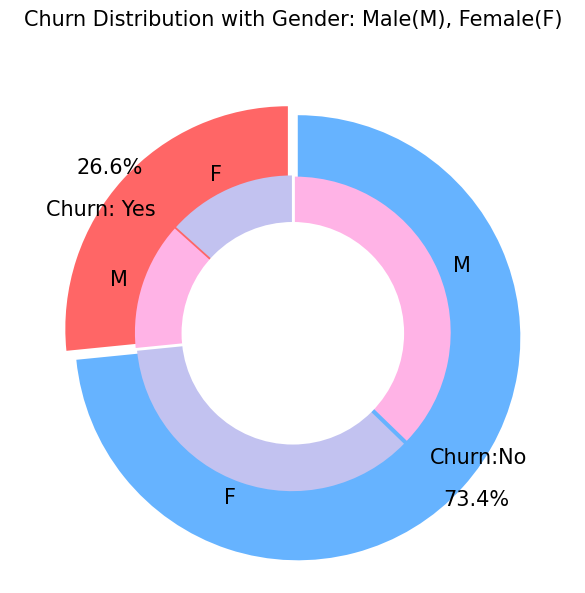

In [22]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution with Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [23]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [24]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [25]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution with Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [26]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [27]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [28]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [29]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution with Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [30]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution with Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

In [31]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution with Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Senior citizens are more likely to churn

In [32]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn with Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with internet churn in the absence of online security, 

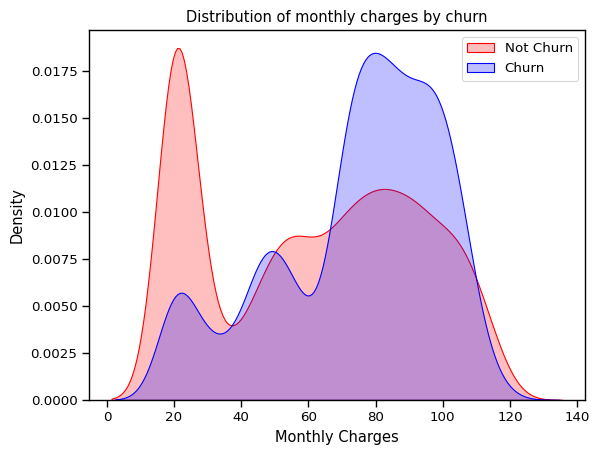

In [33]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

* Customers with higher Monthly Charges are also more likely to churn

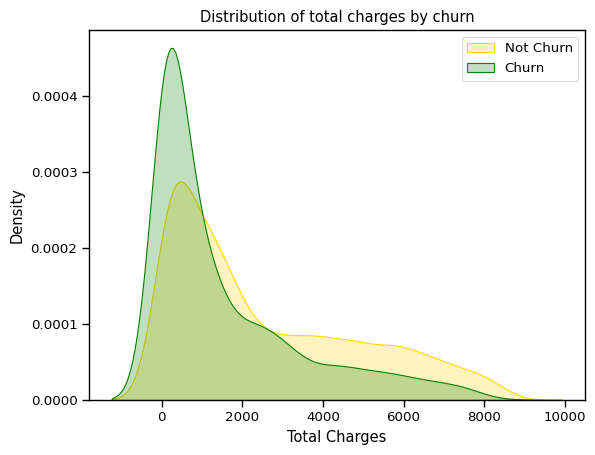

In [34]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [35]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn

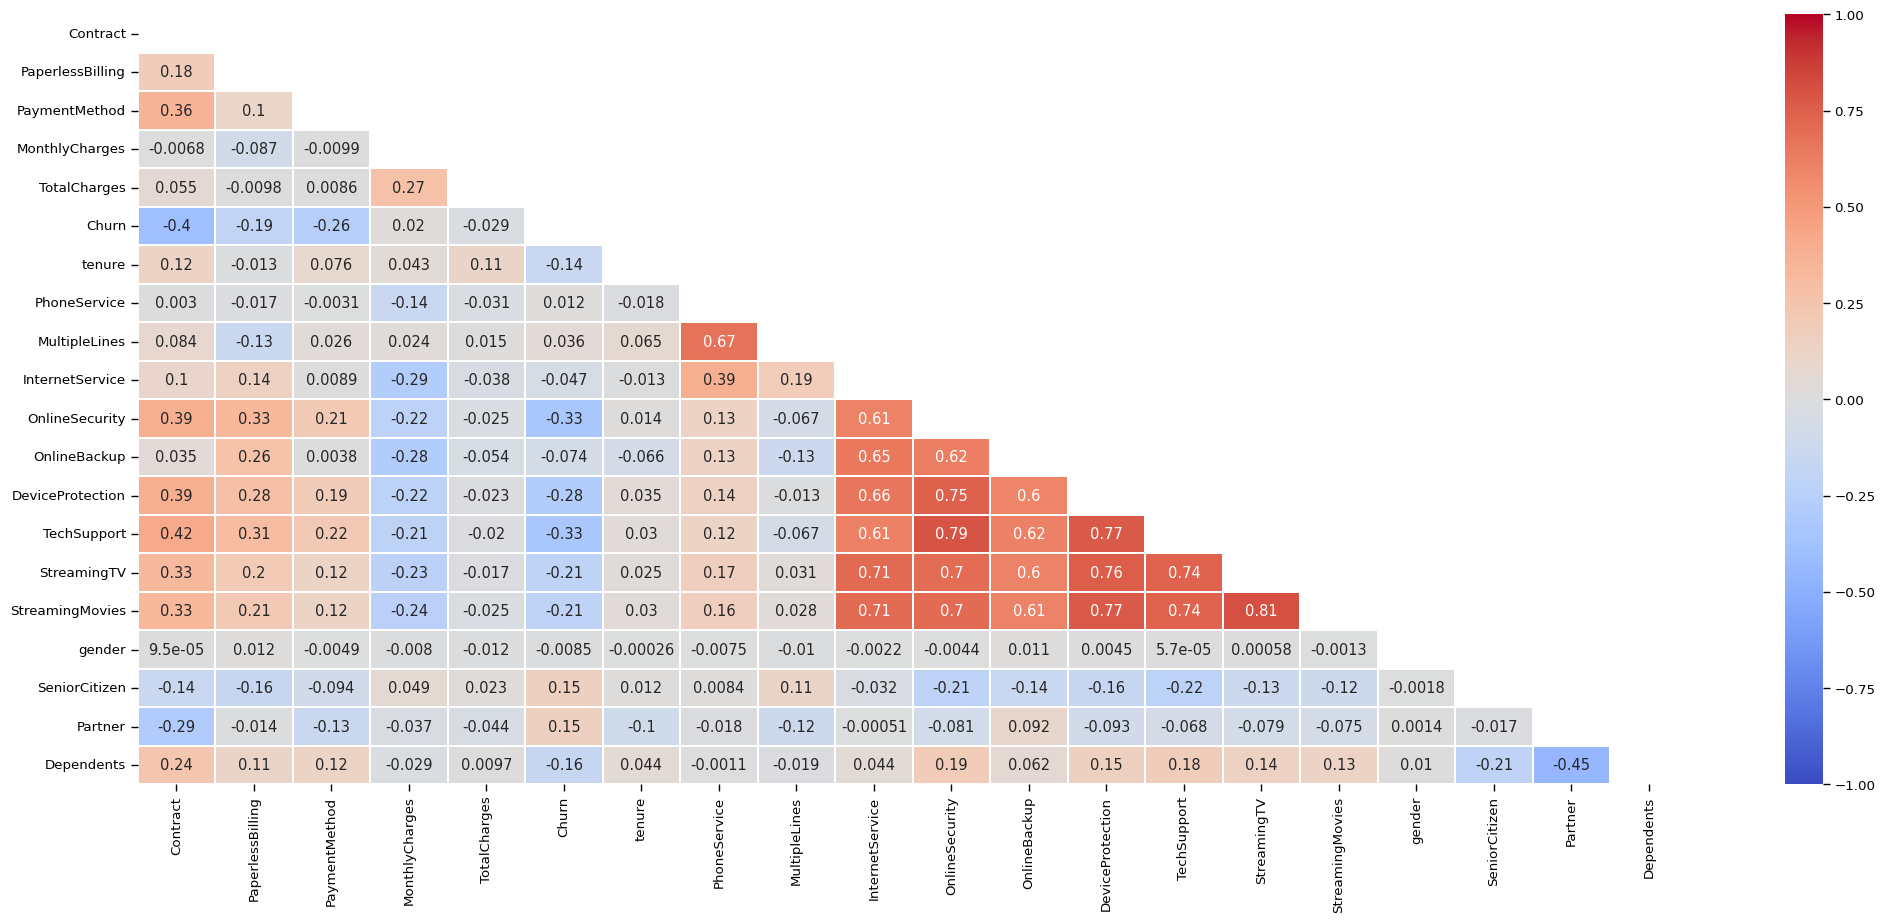

In [36]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

___

## Data Preprocessing

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [74]:
## Change the data to better reflect quality
#df["MultipleLines"]= df["MultipleLines"].map({"No phone service": "No"})
#df["InternetService"]= df["InternetService"].map({"Fiber optic": "Yes", "DSL": "Yes"})
#df["OnlineSecurity"]= df["OnlineSecurity"].map({"No internet service": "No"})
#df["OnlineBackup"]= df["OnlineBackup"].map({"No internet service": "No"})
#df["DeviceProtection"]= df["DeviceProtection"].map({"No internet service": "No"})
#df["TechSupport"]= df["TechSupport"].map({"No internet service": "No"})
#df["StreamingTV"]= df["StreamingTV"].map({"No internet service": "No"})
#df["StreamingMovies"]= df["StreamingMovies"].map({"No internet service": "No"})
#df["PaymentMethod"]= df["PaymentMethod"].map({"Electronic check": "Yes", "Mailed check":"No", "Bank transfer (automatic)":"Yes", "Credit card (automatic)":"Yes"})

# df=df.drop(['gender'],axis=1)
# df=df.drop(['MultipleLines', 'OnlineSecurity','DeviceProtection','StreamingMovies','StreamingTV','TechSupport'],axis=1)

In [38]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df.head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,Month-to-month,Yes,Yes,29.85,29.85,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Female,No,Yes,No
1,One year,No,No,56.95,1889.50,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Male,No,No,No
2,Month-to-month,Yes,No,53.85,108.15,Yes,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,No,No,No
3,One year,No,Yes,42.30,1840.75,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,No,No,No
4,Month-to-month,Yes,Yes,70.70,151.65,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Female,No,No,No


In [39]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,0,1,1,29.85,29.85,0,1,0,1,0,0,2,0,0,0,0,0,0,1,0
1,1,0,0,56.95,1889.50,0,34,1,0,0,2,0,2,0,0,0,1,0,0,0
2,0,1,0,53.85,108.15,1,2,1,0,0,2,2,0,0,0,0,1,0,0,0
3,1,0,1,42.30,1840.75,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,1,1,70.70,151.65,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.090773
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [41]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [43]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

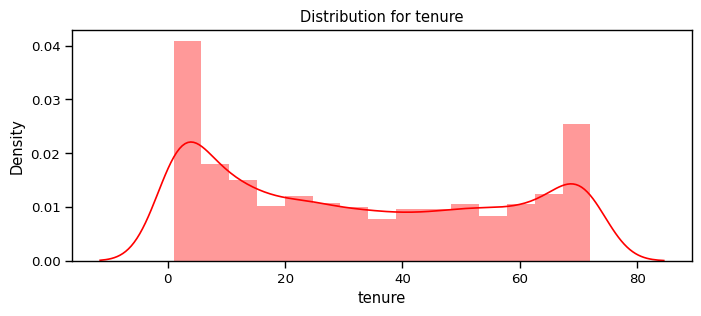

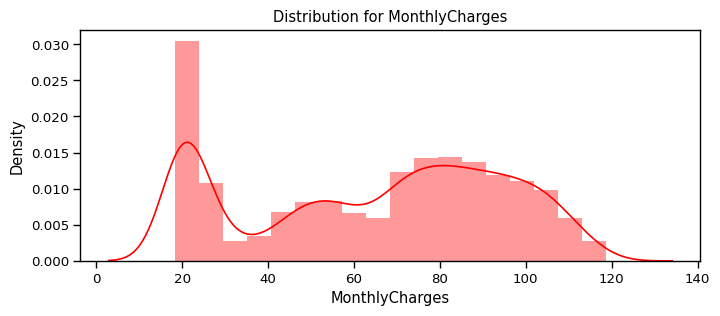

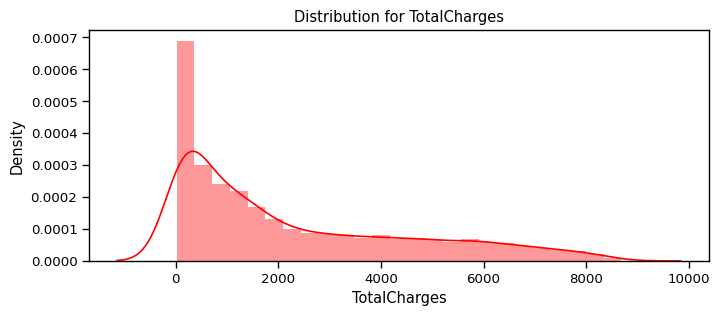

In [44]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

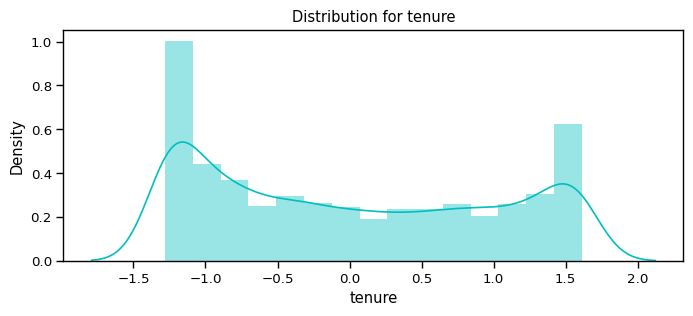

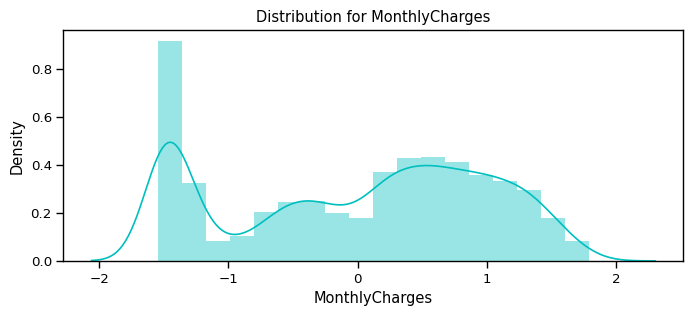

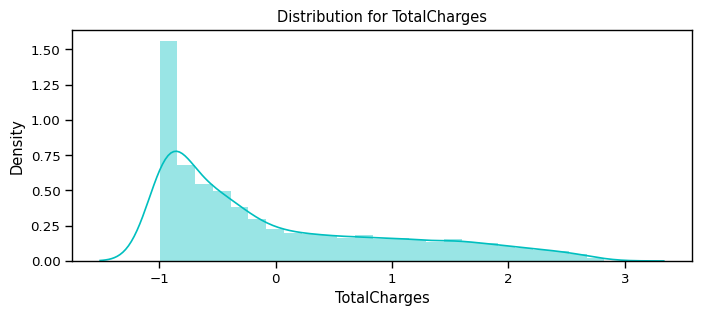

In [45]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [46]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [47]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Machine Learning Model Evaluations and Predictions

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [48]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.776303317535545


In [49]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [50]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8023696682464455


In [51]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.68      0.49      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [52]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8109004739336493


In [53]:
importance = model_rf.feature_importances_
print(importance)

[0.19783597 0.01519401 0.00679615 0.09912776 0.11897723 0.17343157
 0.00273481 0.00833135 0.06272446 0.11214913 0.0378063  0.0242943
 0.10053479 0.0093698  0.00885517 0.00297531 0.00817655 0.00522496
 0.00546038]


In [54]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.70      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



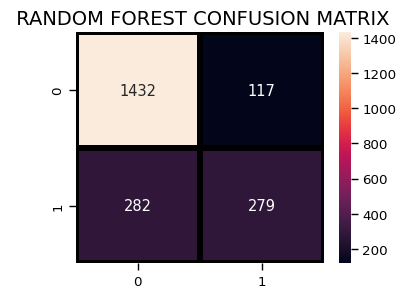

In [55]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

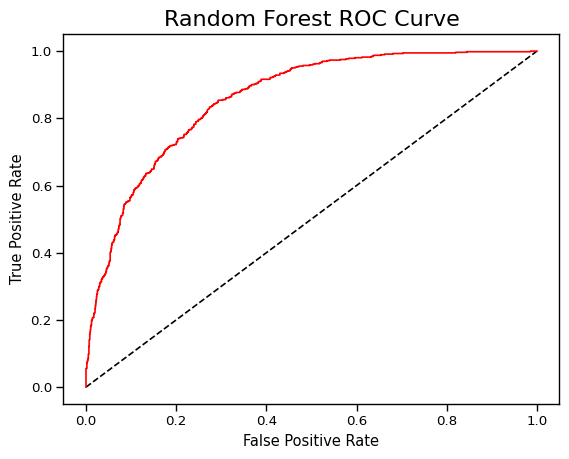

In [56]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [57]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [58]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



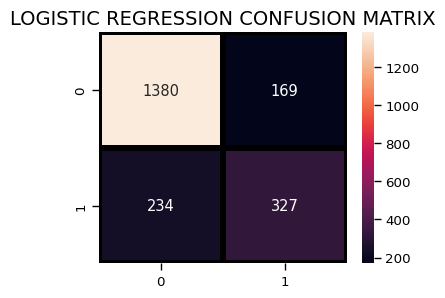

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

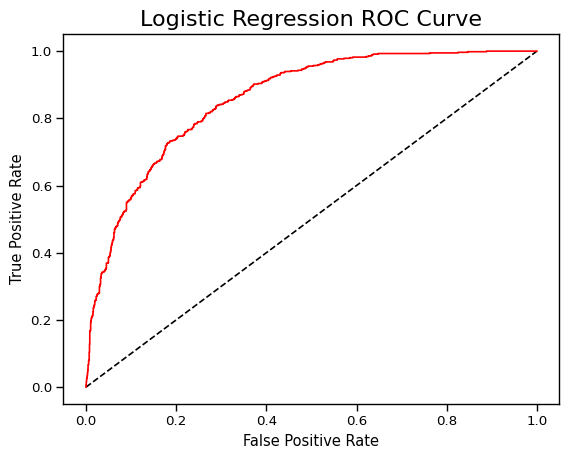

In [60]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [61]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7232227488151659


Decision tree gives very low score.

In [62]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.51      0.49       561

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.73      2110



<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [63]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8071090047393364

In [64]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.53      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



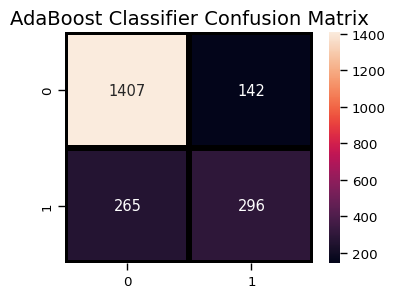

In [65]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [66]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8066350710900474


In [67]:
X_test.head(1)

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
5710,2,1,1,1.52528,2.417571,1.537893,1,2,1,0,2,2,2,2,2,0,0,1,0


In [68]:
importance = gb.feature_importances_
print(importance)

[0.38548707 0.0177966  0.00493381 0.135575   0.11269231 0.14932003
 0.00411222 0.00835214 0.0164264  0.06456875 0.00860994 0.00607796
 0.05988825 0.00287663 0.01146042 0.00085166 0.00674638 0.00104532
 0.00317909]


In [69]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



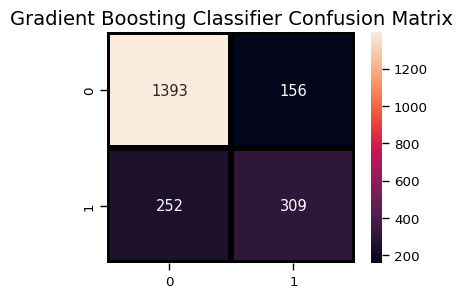

In [70]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "108" ></a>
#### **Voting Classifier**
<a id = "vc" ></a>
Let's now predict the final model based on the highest majority of voting and check it's score.

In [71]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8161137440758294


In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



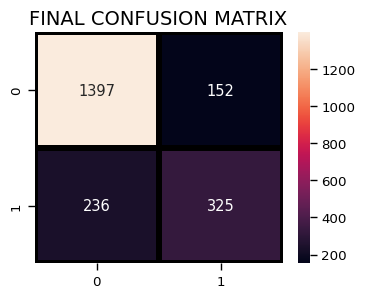

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

Confusion matrix report

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn. 

add recommwndations